In [227]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from collections import OrderedDict
from sklearn.model_selection import cross_validate


In [228]:
#Import data into dataframe
pred_data = pd.read_csv('/Users/jenny.wade@schibsted.com/Documents/GitHub/prediktiv_analys/Assignment/prediktiv_data.csv', index_col='id')

Initial exploration of the data below

In [229]:
pred_data.describe()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature10.1,feature14,feature17,feature18,feature19,feature20,feature21,feature22,feature23
count,2930.000000,2929.000000,2929.000000,2930.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,180796.060068,1.766815,472.819734,2.243345,1051.614544,1159.557679,6.443003,1499.690444,6.094881,5.563140,1971.356314,1.566553,0.599317,2.854266,1.044369,6.216041,2007.790444,0.379522,335.455973,1984.266553
std,79886.692357,0.760566,215.046549,35.597181,440.615067,391.890885,1.572964,505.508887,1.411026,1.111537,30.245361,0.552941,0.647921,0.827731,0.214076,2.714492,1.316613,0.502629,428.395715,20.860286
min,12789.000000,0.000000,0.000000,0.000000,0.000000,334.000000,2.000000,334.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,1950.000000
25%,129500.000000,1.000000,320.000000,0.000000,793.000000,876.250000,5.000000,1126.000000,5.000000,5.000000,1954.000000,1.000000,0.000000,2.000000,1.000000,4.000000,2007.000000,0.000000,0.000000,1965.000000
50%,160000.000000,2.000000,480.000000,0.000000,990.000000,1084.000000,6.000000,1442.000000,6.000000,5.000000,1973.000000,2.000000,1.000000,3.000000,1.000000,6.000000,2008.000000,0.000000,0.000000,1993.000000
75%,213500.000000,2.000000,576.000000,0.000000,1302.000000,1384.000000,7.000000,1742.750000,7.000000,6.000000,2001.000000,2.000000,1.000000,3.000000,1.000000,8.000000,2009.000000,1.000000,703.750000,2004.000000
max,755000.000000,5.000000,1488.000000,800.000000,6110.000000,5095.000000,15.000000,5642.000000,10.000000,9.000000,2010.000000,4.000000,4.000000,8.000000,3.000000,12.000000,2010.000000,2.000000,2065.000000,2010.000000


In [230]:
pred_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       2930 non-null   int64  
 1   feature01    2929 non-null   float64
 2   feature02    2929 non-null   float64
 3   feature03    2930 non-null   int64  
 4   feature04    2929 non-null   float64
 5   feature05    2930 non-null   int64  
 6   feature06    2930 non-null   int64  
 7   feature07    2930 non-null   int64  
 8   feature08    2930 non-null   int64  
 9   feature09    2930 non-null   int64  
 10  feature10    2930 non-null   int64  
 11  feature10.1  2930 non-null   int64  
 12  feature11    198 non-null    object 
 13  feature12    572 non-null    object 
 14  feature13    2929 non-null   object 
 15  feature14    2930 non-null   int64  
 16  feature15    1508 non-null   object 
 17  feature16    2930 non-null   object 
 18  feature17    2930 non-null   int64  
 19  featur

In [231]:
pred_data.shape

(2930, 25)

In [232]:
pred_data.head()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
id,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,...,2,good,bad,3,1,5,2010,0,0,1960
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,...,0,NaN,bad,2,1,6,2010,0,0,1961
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,...,0,NaN,good,3,1,6,2010,1,0,1958
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,...,2,bad,amazing,3,1,4,2010,1,0,1968
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,...,1,bad,bad,3,1,3,2010,1,701,1998


In [233]:
pred_data.tail()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
id,,,,,,,,,,,,,,,,,,,,,
2926,142500,2.0,588.0,0,1003.0,1003,6,1003,6,6,...,0,NaN,bad,3,1,3,2006,0,0,1984
2927,131000,2.0,484.0,0,864.0,902,5,902,5,5,...,0,NaN,bad,2,1,6,2006,0,0,1983
2928,132000,0.0,0.0,0,912.0,970,6,970,5,5,...,0,NaN,bad,3,1,7,2006,0,0,1992
2929,170000,2.0,418.0,0,1389.0,1389,6,1389,5,5,...,1,bad,bad,2,1,4,2006,0,0,1975
2930,188000,3.0,650.0,0,996.0,996,9,2000,7,5,...,1,bad,bad,3,1,11,2006,1,1004,1994


Qualitative (categorical) features include feature 10, 11, 12, 13, 15, 16, 20 and 23. 15 and 16 have categories (quality / animals etc), and 10, 20 and 23 are years which are set points.

I will convert the categorical features that contain text to dummies. 10, 20 and 23 will remain the same.

The rest of the features are quantative / numerical.

In [234]:
#Checking what the unique values are in feature 11, 12 and 13
print(pred_data['feature11'].unique())
print(pred_data['feature12'].unique())
print(pred_data['feature13'].unique())
print(pred_data['feature15'].unique())
print(pred_data['feature16'].unique())

[nan 'Pave' 'Grvl']
[nan 'dog' 'cat' 'cow' 'frog']
['red' 'blue' 'green' 'yellow' nan 'pink']
['good' nan 'bad' 'horrible' 'amazing' 'okay']
['bad' 'good' 'amazing' 'okay' 'horrible']


In [235]:
#Creating dummies of the above
pred_data = pd.concat([pred_data, pd.get_dummies(pred_data['feature11'], prefix=None)],axis=1)
pred_data = pd.concat([pred_data, pd.get_dummies(pred_data['feature12'], prefix=None)],axis=1)
pred_data = pd.concat([pred_data, pd.get_dummies(pred_data['feature13'], prefix=None)],axis=1)
pred_data = pd.concat([pred_data, pd.get_dummies(pred_data['feature15'], prefix='f15')],axis=1)
pred_data = pd.concat([pred_data, pd.get_dummies(pred_data['feature16'], prefix='f16')],axis=1)

In [236]:
#Gathering the columns to drop
cols_to_drop = pred_data[['feature11', 'feature12', 'feature13', 'feature15', 'feature16']]
#Dropping the columns
pred_data.drop(cols_to_drop, axis=1, inplace=True)

In [237]:
pred_data.head()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,f15_amazing,f15_bad,f15_good,f15_horrible,f15_okay,f16_amazing,f16_bad,f16_good,f16_horrible,f16_okay
id,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,...,0,0,1,0,0,0,1,0,0,0
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,...,0,0,0,0,0,0,1,0,0,0
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,...,0,0,0,0,0,0,0,1,0,0
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,...,0,1,0,0,0,1,0,0,0,0
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,...,0,1,0,0,0,0,1,0,0,0


In [238]:
#Checking for na values
nan_per_col = pred_data.isna().sum()
print(nan_per_col)

target          0
feature01       1
feature02       1
feature03       0
feature04       1
feature05       0
feature06       0
feature07       0
feature08       0
feature09       0
feature10       0
feature10.1     0
feature14       0
feature17       0
feature18       0
feature19       0
feature20       0
feature21       0
feature22       0
feature23       0
Grvl            0
Pave            0
cat             0
cow             0
dog             0
frog            0
blue            0
green           0
pink            0
red             0
yellow          0
f15_amazing     0
f15_bad         0
f15_good        0
f15_horrible    0
f15_okay        0
f16_amazing     0
f16_bad         0
f16_good        0
f16_horrible    0
f16_okay        0
dtype: int64


In [239]:
#Feature 1, 2 and 4 contains one na value each so will remove these rows as there's so few
pred_data.dropna(subset = ["feature01"], inplace=True)
pred_data.dropna(subset = ["feature02"], inplace=True)
pred_data.dropna(subset = ["feature04"], inplace=True)
#When running above 'Checking for nan' it now shows 0 on all columns, and when going back to info() only two rows were removed

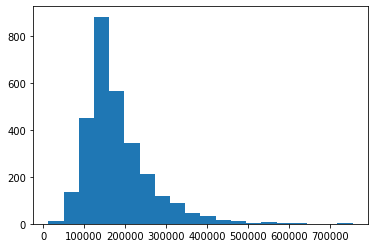

In [240]:
fig, ax = plt.subplots()
plt.hist(pred_data['target'], bins=20)
plt.show()

When viewing scatterplots later on there is one major outlier, and a few strays. I'll be using rows under 400 000 as this improved the results in my models.

In [241]:
#Creating copy of df
pred_data_copy = pred_data

In [242]:
pred_data = pred_data[pred_data.target <= 400000]

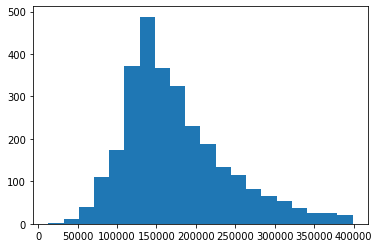

In [243]:
fig, ax = plt.subplots()
plt.hist(pred_data['target'], bins=20)
plt.show()

Creating models and training it with full dataset and RobustScaler

In [244]:
#Splitting into test and train
X = pred_data.drop('target', axis=1)
feature_names = X.columns
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = pred_data['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [245]:
#Creating dataframe for analysing models
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['NULL', 'MLR', 'KNN', 'LASSO'])

In [246]:
#NULL
y_pred_null = y_train.mean()
models.loc['train_mse','NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train)
models.loc['test_mse','NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)

In [247]:
#MLR
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
models.loc['train_mse','MLR'] = mean_squared_error(y_pred=linear_regression.predict(x_train), y_true=y_train)
models.loc['test_mse','MLR'] = mean_squared_error(y_pred=linear_regression.predict(x_test), y_true=y_test)
models.loc['test_r2', 'MLR'] = r2_score(y_pred=linear_regression.predict(x_test), y_true=y_test)

In [248]:
#Lasso
lasso = Lasso(alpha=0.05)
lasso.fit(x_train, y_train)
models.loc['train_mse','LASSO'] = mean_squared_error(y_pred=lasso.predict(x_train), y_true=y_train)
models.loc['test_mse','LASSO'] = mean_squared_error(y_pred=lasso.predict(x_test), y_true=y_test)
models.loc['test_r2', 'LASSO'] = r2_score(y_pred=lasso.predict(x_test), y_true=y_test)

/Users/jenny.wade@schibsted.com/opt/miniconda3/envs/pred/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.698e+11, tolerance: 9.935e+08
  model = cd_fast.enet_coordinate_descent(


In [249]:
#KNN
knn = KNeighborsRegressor(n_neighbors=30, weights='distance', metric='euclidean', n_jobs=-1)
knn.fit(x_train, y_train)
models.loc['train_mse','KNN'] = mean_squared_error(y_pred=knn.predict(x_train), y_true=y_train)
models.loc['test_mse','KNN'] = mean_squared_error(y_pred=knn.predict(x_test), y_true=y_test)
models.loc['test_r2', 'KNN'] = r2_score(y_pred=knn.predict(x_test), y_true=y_test)

In [250]:
models

,NULL,MLR,KNN,LASSO
train_mse,4336335917.904231,763547816.853986,40549.604758,763547990.324104
test_mse,4569145233.881576,673533678.823649,719220102.97621,673537919.328139
test_r2,NaN,0.851972,0.841931,0.851971


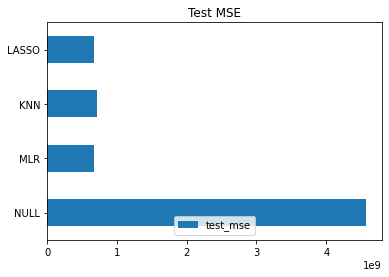

In [251]:
fig, ax = plt.subplots()
models.loc['test_mse'].plot(kind='barh', ax=ax)
ax.set_title('Test MSE')
ax.legend(loc=8, ncol=4)

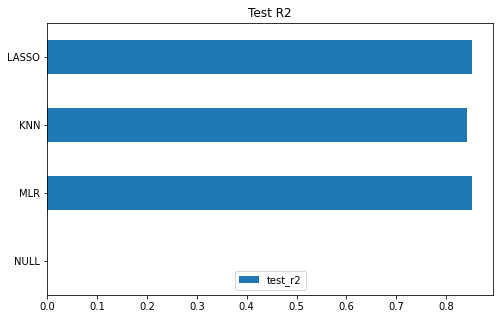

In [252]:
fig, ax = plt.subplots(figsize=(8,5))
models.loc['test_r2'].plot(kind='barh', ax=ax)
ax.set_title('Test R2')
ax.legend(loc=8, ncol=4)

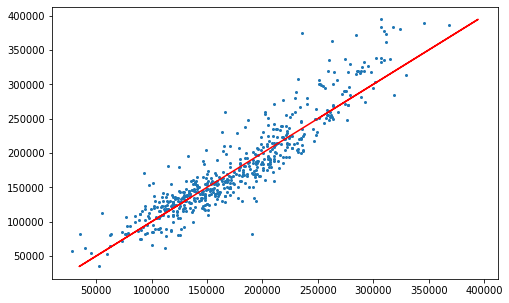

In [253]:
#MLR seems to be the best model
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(linear_regression.predict(x_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')

Now trying the same models with our top correlated features

In [254]:
#Checking features based on correlation to target
t10_corr_features = pred_data.corr().loc['target'].apply(np.abs).sort_values(ascending=False).index[1:11]
t10_corr_features = list(t10_corr_features)
t10_corr_features

['feature08',
 'feature07',
 'feature01',
 'feature02',
 'feature10',
 'feature04',
 'feature05',
 'feature23',
 'feature10.1',
 'f16_bad']

In [255]:
#Splitting into data again using our top features
target_name = 'target'
X = pred_data[t10_corr_features]
y = pred_data[target_name]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)



In [256]:
#NULL
y_pred_null = y_train.mean()
models.loc['train_mse','T10_NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train)
models.loc['test_mse','T10_NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)

#MLR
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
models.loc['train_mse','T10_MLR'] = mean_squared_error(y_pred=linear_regression.predict(x_train), y_true=y_train)
models.loc['test_mse','T10_MLR'] = mean_squared_error(y_pred=linear_regression.predict(x_test), y_true=y_test)
models.loc['test_r2', 'T10_MLR'] = r2_score(y_pred=linear_regression.predict(x_test), y_true=y_test)

#Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
models.loc['train_mse','T10_LASSO'] = mean_squared_error(y_pred=lasso.predict(x_train), y_true=y_train)
models.loc['test_mse','T10_LASSO'] = mean_squared_error(y_pred=lasso.predict(x_test), y_true=y_test)
models.loc['test_r2', 'T10_LASSO'] = r2_score(y_pred=lasso.predict(x_test), y_true=y_test)

#KNN
knn = KNeighborsRegressor(n_neighbors=30, weights='distance', metric='euclidean', n_jobs=-1)
knn.fit(x_train, y_train)
models.loc['train_mse','T10_KNN'] = mean_squared_error(y_pred=knn.predict(x_train), y_true=y_train)
models.loc['test_mse','T10_KNN'] = mean_squared_error(y_pred=knn.predict(x_test), y_true=y_test)
models.loc['test_r2', 'T10_KNN'] = r2_score(y_pred=knn.predict(x_test), y_true=y_test)

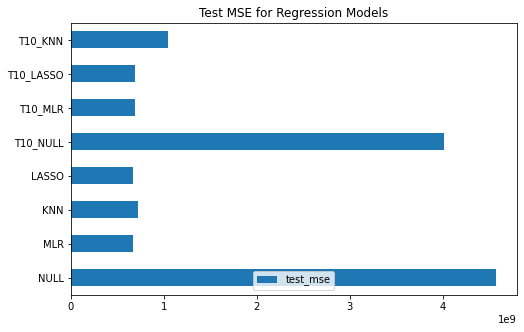

In [257]:
#Checking our models again
fig, ax = plt.subplots(figsize=(8,5))
models.loc['test_mse'].plot(kind='barh', ax=ax)
ax.set_title('Test MSE for Regression Models')
ax.legend(loc=8, ncol=4)

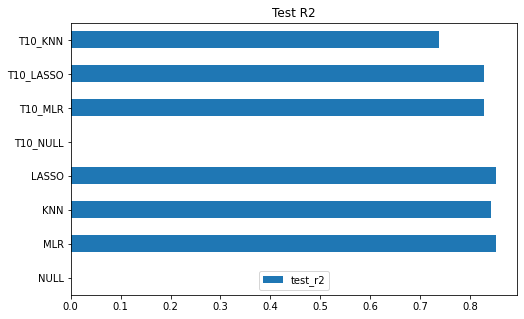

In [258]:
fig, ax = plt.subplots(figsize=(8,5))
models.loc['test_r2'].plot(kind='barh', ax=ax)
ax.set_title('Test R2')
ax.legend(loc=8, ncol=4)

In [259]:
models

,NULL,MLR,KNN,LASSO,T10_NULL,T10_MLR,T10_LASSO,T10_KNN
train_mse,4336335917.904231,763547816.853986,40549.604758,763547990.324104,4.477593e+09,9.214073e+08,9.214073e+08,1.342519e+06
test_mse,4569145233.881576,673533678.823649,719220102.97621,673537919.328139,4.007526e+09,6.859904e+08,6.859911e+08,1.040364e+09
test_r2,NaN,0.851972,0.841931,0.851971,NaN,8.273207e-01,8.273206e-01,7.381169e-01


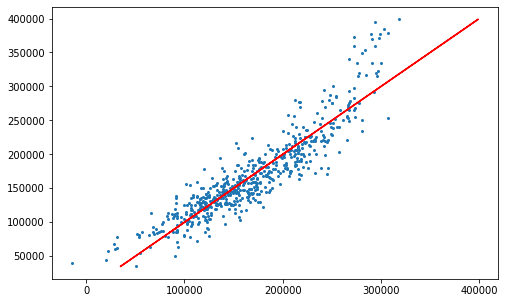

In [260]:
#MLR seems to be the best model
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(linear_regression.predict(x_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')

Testing Random Forest

In [261]:
RF = RandomForestClassifier(n_estimators=100, max_depth=20, max_features='auto',
                            random_state=55, n_jobs=-1)

In [262]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
MLR_cross_val = cross_validate(estimator=linear_regression,X=X,y=y,
                                    scoring='r2', 
                                    cv=10, n_jobs=-1)['test_score']


lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
lasso_cross_val = cross_validate(estimator=lasso,X=X,y=y,
                                    scoring='r2', 
                                    cv=10, n_jobs=-1)['test_score']


knn = KNeighborsRegressor(n_neighbors=20, weights='distance', metric='euclidean', n_jobs=-1)
knn_cross_val = cross_validate(estimator=knn,X=X,y=y,
                                    scoring='r2', 
                                    cv=10, n_jobs=-1)['test_score']


RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
rf_cross_val = cross_validate(estimator=RF,X=X,y=y,
                                    scoring='r2', 
                                    cv=10, n_jobs=-1)['test_score']



In [263]:
rf_cross_val

array([0.85538106, 0.85487092, 0.82907747, 0.8687937 , 0.76586034,
       0.86192086, 0.84437302, 0.78056932, 0.92095834, 0.77924806])

In [264]:
cross_val_scores = -1*pd.DataFrame({'MLR':MLR_cross_val, 'LASSO': lasso_cross_val,
                                    'KNN':knn_cross_val, 'RandomForest':rf_cross_val})
#To convert negative values                                
cross_val_scores = -1*cross_val_scores
cross_val_scores

,MLR,LASSO,KNN,RandomForest
0,0.828956,0.828955,0.752217,0.855381
1,0.822873,0.822872,0.754451,0.854871
2,0.800324,0.800326,0.574160,0.829077
3,0.815142,0.815142,0.804275,0.868794
4,0.783569,0.783570,0.697680,0.765860
5,0.697980,0.697979,0.781424,0.861921
6,0.824466,0.824466,0.701331,0.844373
7,0.626214,0.626213,0.680435,0.780569
8,0.847371,0.847371,0.809779,0.920958
9,0.753790,0.753790,0.592704,0.779248


In [265]:
print(cross_val_scores.mean())

MLR             0.780068
LASSO           0.780068
KNN             0.714846
RandomForest    0.836105
dtype: float64


In [266]:
RF.fit(x_train, y_train)
models.loc['train_mse','RF'] = mean_squared_error(y_pred=RF.predict(x_train), y_true=y_train)
models.loc['test_mse','RF'] = mean_squared_error(y_pred=RF.predict(x_test), y_true=y_test)
models.loc['test_r2', 'RF'] = r2_score(y_pred=RF.predict(x_test), y_true=y_test)

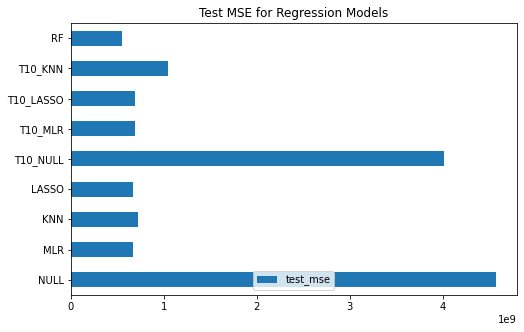

In [267]:
#Checking our models again
fig, ax = plt.subplots(figsize=(8,5))
models.loc['test_mse'].plot(kind='barh', ax=ax)
ax.set_title('Test MSE for Regression Models')
ax.legend(loc=8, ncol=4)

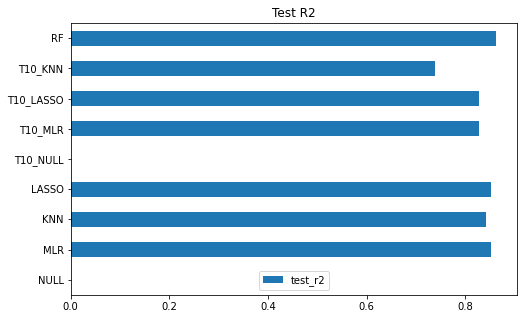

In [268]:
fig, ax = plt.subplots(figsize=(8,5))
models.loc['test_r2'].plot(kind='barh', ax=ax)
ax.set_title('Test R2')
ax.legend(loc=8, ncol=4)

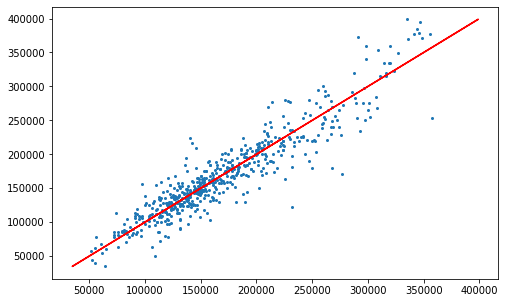

In [269]:
#RF seems to be the best model now looking at MSE and r2, and our r2 mean in the cross valiation
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(RF.predict(x_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')

Creating a predicting something new

In [270]:
new = OrderedDict([('feature08',5), ('feature07',1952), ('feature01',2.0), ('feature02',420.0),
                    ('feature10', 1972), ('feature04',972.0), ('feature05',678), ('feature23',1988),
                    ('feature10.1',1), ('f16_bad',0)])
new = pd.Series(new).values.reshape(1,-1)

In [271]:
RF.predict(new)

/Users/jenny.wade@schibsted.com/opt/miniconda3/envs/pred/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([170858.36095238])